Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd

# Step 1: Load the DataFrames
station_df = pd.read_csv('newyork_bike_stations_details.csv')  
yelp_df = pd.read_csv('yelp_poi_data_nyc.csv')  # Yelp POI details for NYC

# Step 2: Merge the DataFrames using an outer join
merged_df = pd.merge(
    station_df, yelp_df,
    on=['Latitude', 'Longitude'],  # Match based on geographic coordinates
    how='outer'  # Use outer join to include all rows from both DataFrames
)

# Step 3: Display the merged DataFrame
print("Merged DataFrame (Outer Join):")
print(merged_df)

# Step 4: Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_newyork_bike_yelp_data_outer.csv', index=False)  # Save without the index column
print("Merged data successfully saved to 'merged_newyork_bike_yelp_data_outer.csv'.")

Merged DataFrame (Outer Join):
                                       Name   Latitude  Longitude  Free Bikes  \
0                           67 St & Erik Pl  40.633385 -74.016562        19.0   
1                             7 Ave & 62 St  40.635560 -74.012980        18.0   
2                             5 Ave & 67 St  40.635679 -74.020005        11.0   
3                     4 Ave & Shore Road Dr  40.637033 -74.022141        15.0   
4                             63 St & 5 Ave  40.637660 -74.017820        18.0   
...                                     ...        ...        ...         ...   
2272   Van Cortlandt Park S & Dickinson Ave  40.884350 -73.887810         8.0   
2273  Van Cortlandt Park S & Gouverneur Ave  40.884920 -73.890840         7.0   
2274                    Broadway & W 238 St  40.885240 -73.900770        28.0   
2275                 W 238 St & Tibbett Ave  40.886020 -73.902320        14.0   
2276        Broadway & Van Cortlandt Park S  40.886300 -73.899700        34.0 

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [2]:
import seaborn as sns
import matplotlib

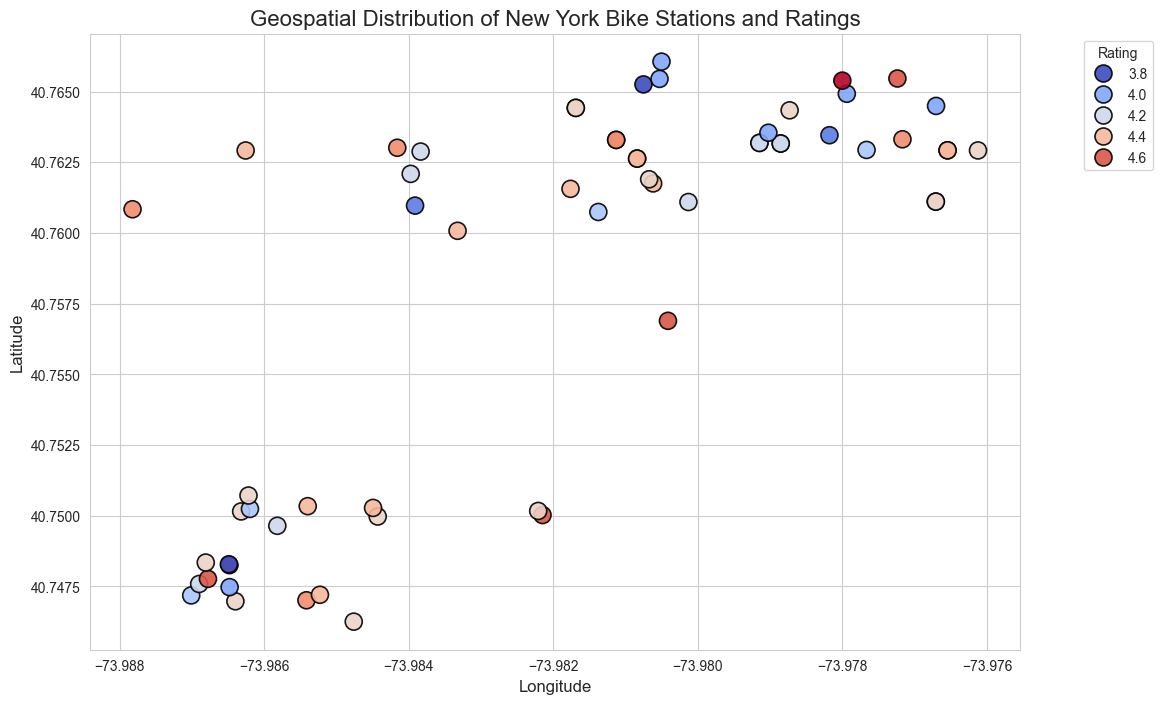

In [4]:

# Set the style for Seaborn
from matplotlib import pyplot as plt


sns.set_style("whitegrid")

# Create a scatter plot for geospatial distribution with ratings
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    x='Longitude', 
    y='Latitude', 
    data=merged_df,
    hue='Rating',          # Use Yelp ratings for color coding
    palette='coolwarm',    # Color scheme to highlight ratings
    alpha=0.9,             # Slightly reduce transparency for boldness
    s=150,                 # Increased marker size
    edgecolor='black',     # Add a bold black outline to markers
    linewidth=1.2          # Thickness of the marker outlines
)

# Add a color bar for ratings
scatter_plot.legend(title='Rating', loc='upper right', bbox_to_anchor=(1.15, 1))

# Add title and labels
scatter_plot.set_title('Geospatial Distribution of New York Bike Stations and Ratings', fontsize=16)
scatter_plot.set_xlabel('Longitude', fontsize=12)
scatter_plot.set_ylabel('Latitude', fontsize=12)

# Show the plot
plt.show()







Station Placement: 
Dense clusters in certain areas indicate popular locations, such as tourists spots, business districts or residential hubs

Correlation with Ratings:
Ratings provide information about the quality of nearby POIs, Which could influence bike station usage or placement

Urban Planning
ident

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [66]:
import pandas as pd
import sqlite3
import os

# Step 1: Ensure the directory exists
os.makedirs('./Users/erum/Statistical-Modelling-Project/data', exist_ok=True)

# Define the database file path
db_path = './Users/erum/Statistical-Modelling-Project/data/results.db'

# Step 2: Load the DataFrame
merged_data = pd.read_csv('merged_newyork_bike_yelp_data_outer.csv')

# Step 3: Create a connection to the SQLite database
connection = sqlite3.connect(db_path)
print(f"Database created at {db_path}")

# Step 4: Save the DataFrame into the SQLite database
merged_data.to_sql('bike_station_results', connection, if_exists='replace', index=False)
print("Results saved successfully into the 'bike_station_results' table.")

# Step 5: Close the database connection
connection.close()
print("Database connection closed.")




Database created at ./Users/erum/Statistical-Modelling-Project/data/results.db
Results saved successfully into the 'bike_station_results' table.
Database connection closed.


Look at the data before and after the join to validate your data.

Compared row counts before and after the join to ensure that the merge operation worked as intended.